In [164]:
import pandas as pd
data = pd.read_csv('data/wine_cleared.csv')

направлении разведывательного анализа данных — проектировании признаков (Feature Engineering). Этот процесс также называют конструированием признаков или разработкой признаков. Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. 

Новые признаки могут быть сконструированы двумя способами: 

1. с помощью внешних источников данных;
2. из существующего набора данных.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1. разбор категорий; 
2. разбор даты и времени;
3. разбор числовых признаков;
4. разбор текста.

РАЗБОР ДАТЫ И ВРЕМЕНИ

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

для удобства сразу преобразуем признак в int

data['price_round'] = data['price'].round().astype(int)


Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.



In [165]:
data['price_round'] = data['price'].round().astype(int)

РАЗБОР ТЕКСТА

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

https://tproger.ru/translations/regular-expression-python/

Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

regex = '\d{4}' # регулярное выражение для нахождения чисел

data['year'] = data['title'].str.findall(regex).str.get(0)
* \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
* {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [166]:
regex = '\d{4}' # регулярное выражение для нахождения чисел

data['year'] = data['title'].str.findall(regex).str.get(0)

In [167]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

2.1 Выберите из списка две самых популярных (помимо США) страны, производящих вино.

In [168]:
data.groupby(by='country').count().sort_values(by='description', ascending=False)

,Unnamed: 0,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
country,,,,,,,,,,,,,,,
US,54504,54504,54504,54504,54504,54504,54504,54504,54504,54504,54504,54504,54504,53585,54504
France,22093,22093,22093,22093,22093,22093,22093,22093,22093,22093,22093,22093,22093,20511,22093
Italy,19540,19540,19540,19540,19540,19540,19540,19540,19540,19540,19540,19540,19540,18550,19540
Spain,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,6142,6645
Portugal,5691,5691,5691,5691,5691,5691,5691,5691,5691,5691,5691,5691,5691,5374,5691
Chile,4472,4472,4472,4472,4472,4472,4472,4472,4472,4472,4471,4472,4472,4445,4472
Argentina,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3755,3800
Austria,3345,3345,3345,3345,3345,3345,3345,3345,3345,3345,3345,3345,3345,3304,3345
Australia,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2260,2329


2.2 Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

In [169]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [170]:
display(data['is_france'].sum())
display(data['is_italy'].sum())

22093

19540

2.3 Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

В ответ впишите результат выполнения кода data['old_wine'].sum():

In [171]:
data['year'] = data['year'].fillna(3000)

In [172]:
data['old_wine'] = data['year'].apply(lambda x: 1 if int(x) < 2010 else 0)
data['old_wine'].sum()

39781

2.7 Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [237]:
data['title']

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 129972, dtype: object

In [238]:
import re
    
data['locality'] = data['title'].apply(lambda x: re.findall(r'\((.*?))', x)[0])
display(data['locality'])

error: unbalanced parenthesis at position 7

___________________________

# Создание признаков. Внешние источники данных

Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

* Открытые источники доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.
* Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

Например, на сайте Федеральной службы государственной статистики (Росстат) вы можете скачать данные об общем приросте населения областей РФ в формате .XLSX, .CSV, .HTML, .DOCX. Вы уже работали с файлами различных форматов в модуле PYTHON-16. Как выгружать данные из файлов разных форматов.
https://showdata.gks.ru/report/278934/

Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу. 

Внешняя информация бывает общая и профильная.

Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 

Они находятся в открытых источниках: Росстат, Википедия и так далее.

Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

Например, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт TripAdvisor для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы — запрос в Dadata.ru для проверки действительности адреса. 

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

РАБОТА С ФАЙЛАМИ

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. Например, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

In [174]:
import pandas as pd
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [175]:
country_population[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

In [176]:
data = data.join(country_population.set_index('country'), on='country')

In [177]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


3.2 Создайте новый признак area_country — площадь страны, аналогичный признаку population.

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [178]:
data = data.join(country_area.set_index('country'), on='country')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129972 non-null  int64  
 1   country                129909 non-null  object 
 2   description            129972 non-null  object 
 3   designation            129972 non-null  object 
 4   points                 129972 non-null  int64  
 5   price                  129972 non-null  float64
 6   province               129909 non-null  object 
 7   region_1               129972 non-null  object 
 8   taster_name            129972 non-null  object 
 9   taster_twitter_handle  129972 non-null  object 
 10  title                  129972 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129972 non-null  object 
 13  price_round            129972 non-null  int32  
 14  year                   129972 non-nu

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129972 non-null  int64  
 1   country                129909 non-null  object 
 2   description            129972 non-null  object 
 3   designation            129972 non-null  object 
 4   points                 129972 non-null  int64  
 5   price                  129972 non-null  float64
 6   province               129909 non-null  object 
 7   region_1               129972 non-null  object 
 8   taster_name            129972 non-null  object 
 9   taster_twitter_handle  129972 non-null  object 
 10  title                  129972 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129972 non-null  object 
 13  price_round            129972 non-null  int32  
 14  year                   129972 non-nu

In [180]:
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

Внешней информации можно получить очень много. Руководствуйтесь следующими правилами при работе с внешними источниками данных:

1. Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.

2. Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.

3. Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.

4. Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 

5. Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

-----------------------

# 4. Создание признаков. Работа с форматом «дата-время»

Большинство алгоритмов машинного обучения не умеют работать с признаками в строковом представлении, поэтому такие признаки должны быть преобразованы в формат числа. Подробнее с алгоритмами машинного обучения вы познакомитесь далее в модулях про машинное обучение.

Чтобы не потерять важную информацию, заключённую в формате даты и времени, необходимо преобразовать эту информацию таким образом, чтобы признак был в формате числа, а не строки. Например, дата последнего захода на сайт может быть преобразована в количество дней с момента последнего входа на сайт.

Также вы можете выделять из даты месяц или время года некоего события. Так вы сможете выяснить, например, влияет ли время года на покупку бытовой техники на сайте компании.

Создавая новые признаки из строковых признаков, мы также можем получить признаки в строковом представлении как в случае со временем суток. Такой признак мы по-прежнему не можем передать в модель. Но можно передать его в виде: 1 — утро, 2 — день, 3 — вечер, 4 — ночь. Этот приём часто используется дата-сайентистами для оцифровки некоторых категорий и называется кодированием. С кодированием признаков мы познакомимся в следующем юните.

 Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет.

Давайте рассмотрим, из каких признаков состоит срез данных:

* client_id — идентификатор клиента в базе;
* agent_date — время соединения с агентом;
* created_at — время соединения с клиентом (начало разговора);
* end_date — время окончания соединения с клиентом (конец разговора).

In [181]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 

In [182]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


4.1 Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [183]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

4.2 Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [184]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

4.3 Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [185]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [186]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

4.5 Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:

data['year'] = pd.to_datetime(data['year'], errors = 'coerce')

Подробнее о назначении этого параметра вы можете прочесть в документации.

In [187]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year']).dt.days
data['years_diff'].max()

98627.0

------------

# 5. Кодирование признаков. Методы

https://contrib.scikit-learn.org/category_encoders/

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется кодированием признаков.

![dst-eda-2-17.png](https://lms.skillfactory.ru/assets/courseware/v1/f9647b8a2fdd6ccc12cec8ba42d522ec/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-3-8.jpg)


Если признак, который вы собираетесь кодировать, порядковый, используйте порядковое кодирование (Ordinal Encoding). 

Для номинальных признаков важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных однократное кодирование (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например бинарный (Binary Encoding).

Для кодирования категориальных признаков мы будем использовать библиотеку category_encoders. Это удобная библиотека для кодирования категориальных переменных различными методами.

pip install category_encoders

In [188]:
import category_encoders as ce

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [189]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


### ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [190]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size']])
clothing = pd.concat([clothing, data_bin],axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


В случае с магазином одежды для размера одежды size уместно применить порядковое кодирование. Кодирование размера xxs, xs, s в 1, 2, 3 будет соответствовать логическому увеличению порядка.

In [191]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,population,area,years_diff
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,"59,097,904",301230.0,3298.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,"10,347,892",92391.0,4029.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,"333,022,386",9372610.0,3298.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,"333,022,386",9372610.0,3298.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,"333,022,386",9372610.0,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,"83,129,285",357022.0,3298.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Citation,75,2004-01-01,1,0,0,1,"333,022,386",9372610.0,6586.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Gresser,30,2013-01-01,0,1,0,0,"68,035,000",547030.0,3298.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,"68,035,000",547030.0,3664.0


In [192]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data[['year']])
data_ord = pd.concat([data, data_bin], axis=1)
data_ord

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,price_round,year,is_usa,is_france,is_italy,old_wine,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2013-01-01,0,0,1,0,"59,097,904",301230.0,3298.0,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,15,2011-01-01,0,0,0,0,"10,347,892",92391.0,4029.0,2011-01-01
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,14,2013-01-01,1,0,0,0,"333,022,386",9372610.0,3298.0,2013-01-01
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,13,2013-01-01,1,0,0,0,"333,022,386",9372610.0,3298.0,2013-01-01
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,65,2012-01-01,1,0,0,0,"333,022,386",9372610.0,3664.0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,28,2013-01-01,0,0,0,0,"83,129,285",357022.0,3298.0,2013-01-01
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,75,2004-01-01,1,0,0,1,"333,022,386",9372610.0,6586.0,2004-01-01
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,30,2013-01-01,0,1,0,0,"68,035,000",547030.0,3298.0,2013-01-01
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,32,2012-01-01,0,1,0,0,"68,035,000",547030.0,3664.0,2012-01-01


### ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

Пример 

Компания, выпускающая аромасвечи, решила узнать, влияет ли регион клиента на выбор их продукции. Признак регион является номинальным, и по правилам блок-схемы мы должны закодировать его однократным кодированием. Таким образом, кодирование признака регион даст нам 84 дополнительных признака для модели. Это может привести к серьёзным проблемам с памятью на наборах с большим количеством строк. 

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [193]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

clothing_dummies = pd.get_dummies(clothing, columns=['type'])

Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными.  

5.4 В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [195]:
data_onehot = pd.get_dummies(data, columns=['taster_name'])
data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129972 non-null  int64         
 1   country                         129909 non-null  object        
 2   description                     129972 non-null  object        
 3   designation                     129972 non-null  object        
 4   points                          129972 non-null  int64         
 5   price                           129972 non-null  float64       
 6   province                        129909 non-null  object        
 7   region_1                        129972 non-null  object        
 8   taster_twitter_handle           129972 non-null  object        
 9   title                           129972 non-null  object        
 10  variety                         129971 non-null  object 

### ДВОИЧНОЕ КОДИРОВАНИЕ

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.
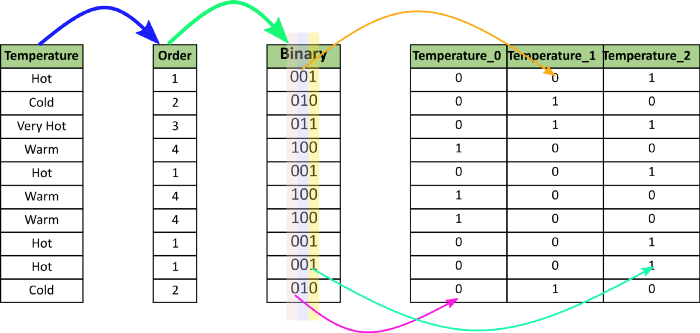

Пошаговый алгоритм двоичного кодирования можно описать так: 

1. значения признака кодируются в некоторый числовой порядок;
2. целые числа кодируются в двоичный код;
3. цифры двоичного представления формируют новые столбцы.

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

In [196]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


5.5 Закодируйте признак country двоичным способом.

Сколько новых признаков образовалось после кодирования признака country?

In [197]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
type_bin = bin_encoder.fit_transform(data['country'])
data_bin = pd.concat([data, type_bin], axis=1)

data_bin

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,old_wine,population,area,years_diff,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,"59,097,904",301230.0,3298.0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,"10,347,892",92391.0,4029.0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,"333,022,386",9372610.0,3298.0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,"333,022,386",9372610.0,3298.0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,"333,022,386",9372610.0,3664.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,"83,129,285",357022.0,3298.0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,1,"333,022,386",9372610.0,6586.0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,"68,035,000",547030.0,3298.0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,"68,035,000",547030.0,3664.0,0,0,0,1,0,1


Метод однократного кодирования можно использовать почти во всех сценариях подготовки данных к обучению за исключением некоторых алгоритмов и проблем с памятью. О том, почему из-за этого может возникнуть проблема, вы узнаете подробнее в модулях про машинное обучение

5.8 На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [198]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
type_bin = bin_encoder.fit_transform(data['country'])
data_bin = pd.concat([data, type_bin], axis=1)

data_bin

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,old_wine,population,area,years_diff,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,"59,097,904",301230.0,3298.0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,"10,347,892",92391.0,4029.0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,"333,022,386",9372610.0,3298.0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,"333,022,386",9372610.0,3298.0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,"333,022,386",9372610.0,3664.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,"83,129,285",357022.0,3298.0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,1,"333,022,386",9372610.0,6586.0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,"68,035,000",547030.0,3298.0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,"68,035,000",547030.0,3664.0,0,0,0,1,0,1


In [199]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data_twit = pd.concat([data, type_bin], axis=1)
data_twit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               129972 non-null  int64         
 1   country                  129909 non-null  object        
 2   description              129972 non-null  object        
 3   designation              129972 non-null  object        
 4   points                   129972 non-null  int64         
 5   price                    129972 non-null  float64       
 6   province                 129909 non-null  object        
 7   region_1                 129972 non-null  object        
 8   taster_name              129972 non-null  object        
 9   taster_twitter_handle    129972 non-null  object        
 10  title                    129972 non-null  object        
 11  variety                  129971 non-null  object        
 12  winery          

5.9 Используйте следующий датафрейм для задания:

list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [200]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [240]:
df_onehot = pd.get_dummies(df, columns=['product', 'price', 'payment_type'])
df_onehot

KeyError: "None of [Index(['product', 'price', 'payment_type'], dtype='object')] are in the [columns]"

------------------

# 6. Преобразование признаков. Нормализация. Стандартизация

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это нормализация и стандартизация, которые мы рассмотрим в этом юните.

Примечание. Операции нормализации и стандартизации также часто называют шкалированием. 

Результат эффективности работы будет формироваться в большей степени за счёт переменной, обозначающей доход из-за больших значений, которые может принимать переменная. Вклад второй переменной в итоговую оценку незначителен из-за её небольших значений Это связано только с тем, что входные данные имеют разный масштаб, а не из-за того, что вторая переменная не значима для результата. 

Таким образом, признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков.

## НОРМАЛИЗАЦИЯ

Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

Существует несколько способов нормализации: MinMaxScaler, RobustScaler.

Используем библиотеку numpy для создания массивов случайных чисел различных распределений. Выполните этот код, чтобы создать обучающий набор различных распределений:

In [201]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

* Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
* Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
* Нормальное распределение, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в руководстве.

https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde

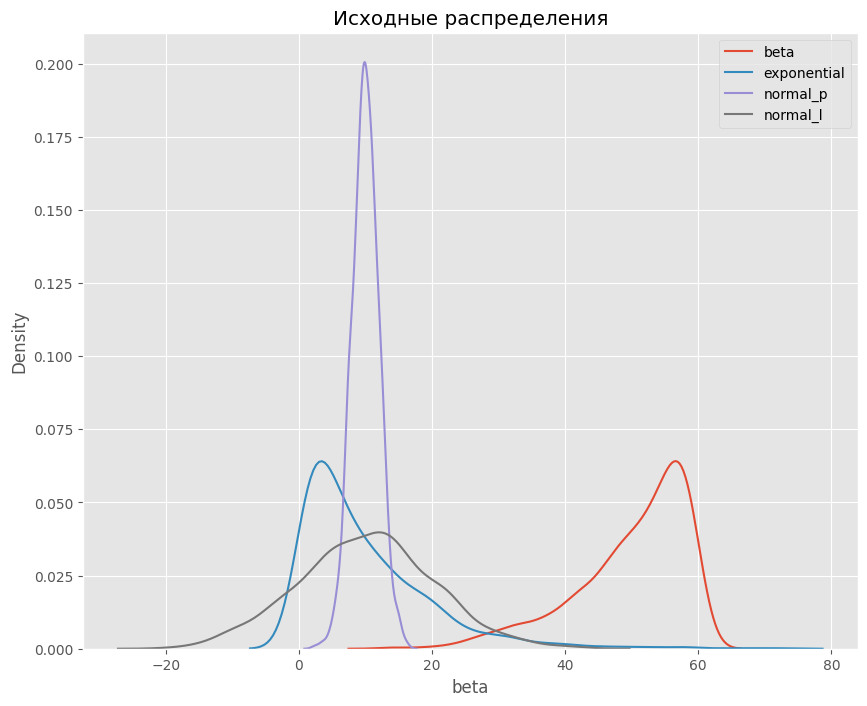

In [202]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.

In [203]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


### MINMAXSCALER

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

1. Из каждого значения признака х вычитается минимальное значение этого признака:  
2. Результат вычитания делится на разность между максимумом и минимумом признака: 

Xscaled = (X-Xmin)/(Xmax-Xmin)


Проведём нормализацию распределений признаков из обучающего примера.

Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. Вы познакомитесь с ней подробнее в модулях машинного обучения.

<AxesSubplot: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

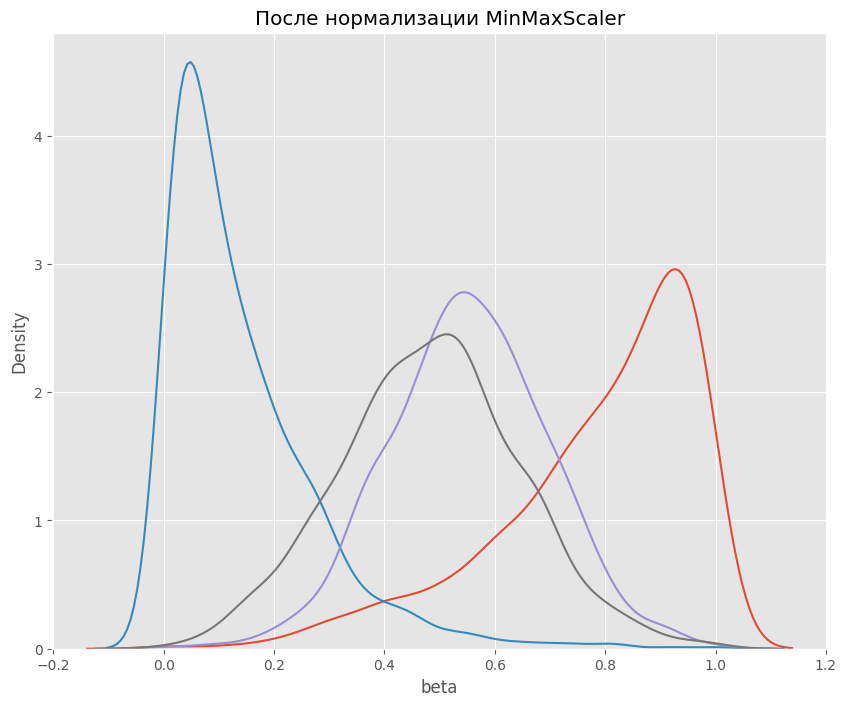

In [204]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [205]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


Как мы видим, значения расположились в диапазоне от минимального 0 до максимального 1, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: скошенные влево/вправо распределения сохранили свою форму.

### ROBUSTSCALER

Нормализация методом RobustScaler происходит в несколько этапов:

1. из каждого значения признака вычитается медиана признака: x - медиана
2. полученное значение делится на межквартильный размах: значение 75% - значение 25%

Xscaled = (X-Xmedian)/IQR

Проведём нормализацию распределений признаков из обучающего примера, используя класс RobustScaler.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

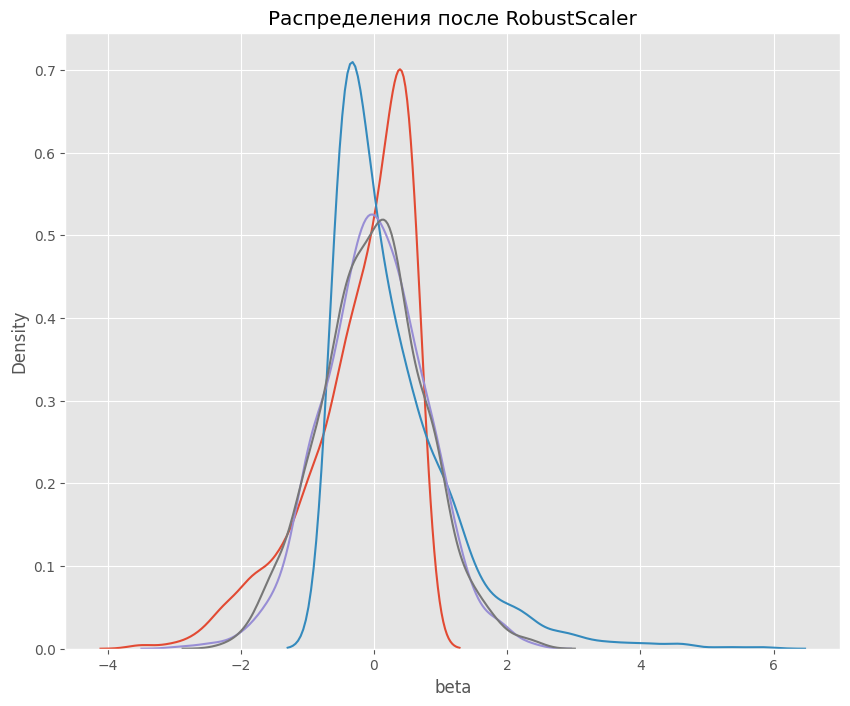

In [206]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [207]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Виды нормализаций и сравнение

## СТАНДАРТИЗАЦИЯ 

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1.

Xscaled = (X-Xmean)/Xstd

Xstd - стандартное отклонение

Например, у нас есть числовой ряд [1, 2, 3, 4, 5]. Среднее ряда: 3. Стандартное отклонение — 1.4. Нормализуем число 4.

Нормализованное число 4 равно 0.7.

Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

### STANDARDSCALER

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

<AxesSubplot: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

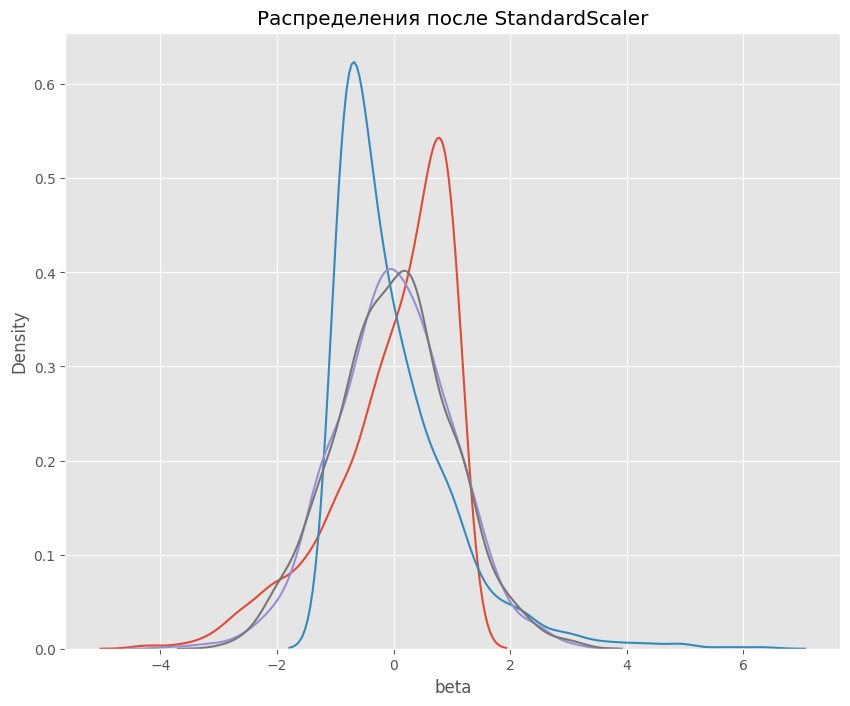

In [208]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [209]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более нормальными.

# НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?

Преобразование входных переменных и выбор способа преобразования зависит от конкретной задачи и данных — заранее невозможно узнать, какое преобразования будет лучше. 

Однако мы составили небольшую инструкцию по преобразованию признаков:

* если признак распределён нормально, то его необходимо стандартизировать;
* если признак распределён ненормально, его необходимо нормализовать;
* если разброс значений небольшой, то можно обойтись без преобразования данных.

6.4 Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

In [210]:
r_scaler = preprocessing.RobustScaler()
data_r = r_scaler.fit_transform(data[['price']])
data_r = pd.DataFrame(data_r, columns=['price'])

round(data_r['price'].sum(), 0)

43501.0

6.5 Стандартизируйте исходный признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

In [212]:
pd.DataFrame(preprocessing.StandardScaler().fit_transform(data[['price']]), columns=['price']).iloc[129969] 
# верный ответ -0.135518, почему не совпал?
# добаилась лишняя стнана, нужно удалить дубликат, значени +1 верное

price   -0.135515
Name: 129969, dtype: float64

------------

# 7. Отбор признаков. Мультиколлинеарность

Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

Отбор признаков помогает:

1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

Датасет iris

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal length — длина наружной доли околоцветника;
* sepal width — ширина наружной доли околоцветника;
* petal length — длина внутренней доли околоцветника;
* petal width — ширина внутренней доли околоцветника.

In [213]:
import pandas as pd

iris = pd.read_csv('data\iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


C:\Users\qwaiv\AppData\Local\Temp\ipykernel_14164\1094387807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов


<AxesSubplot: >

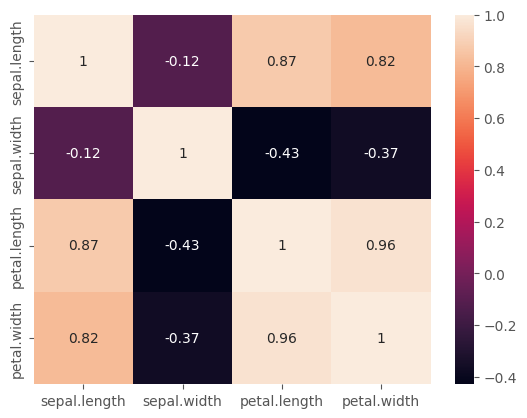

In [214]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).

In [215]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Это означает, что всего два признака — sepal length (длина наружной доли околоцветника) и sepal width (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки petal length (длина внутренней доли околоцветника) и petal width (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

7.3 Какие из признаков имеют самую сильную корреляционную связь?

C:\Users\qwaiv\AppData\Local\Temp\ipykernel_14164\3368540240.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True) # включаем отображение коэффициентов


<AxesSubplot: >

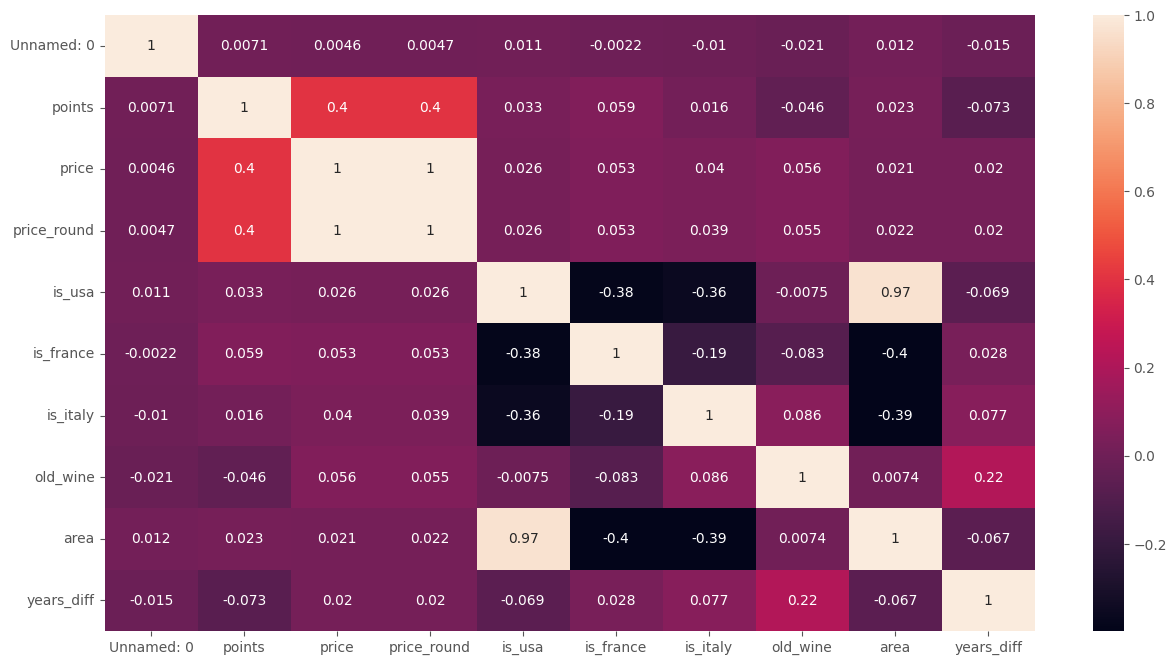

In [219]:
import seaborn as sns # импортируем seaborn для построения графиков
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True) # включаем отображение коэффициентов

7.4 Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона

In [224]:
data_cop = data


C:\Users\qwaiv\AppData\Local\Temp\ipykernel_14164\2363819424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cop.corr(), annot=True) # включаем отображение коэффициентов


<AxesSubplot: >

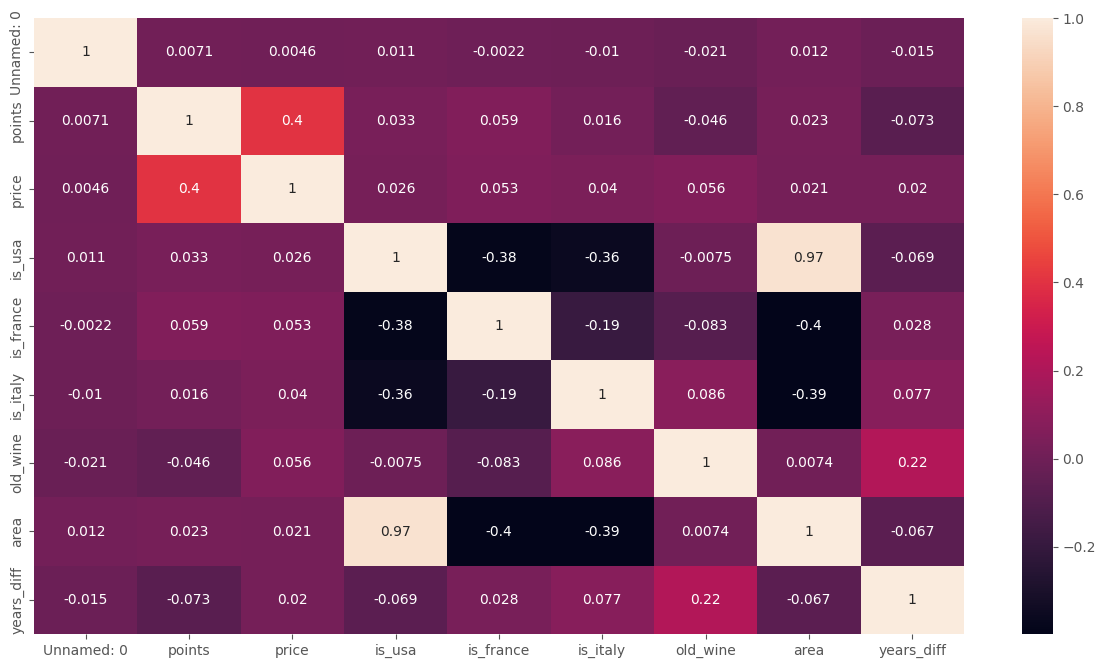

In [226]:
plt.figure(figsize=(15,8))
sns.heatmap(data_cop.corr(), annot=True) # включаем отображение коэффициентов

ответ: year и price
хз почему